In [67]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[*********************100%***********************]  1 of 1 completed

1652 trades taken
Bull FVG 5 Period Average returns: 0.1%
1013 trades taken
Bear FVG 5 Period Average returns: 0.46%


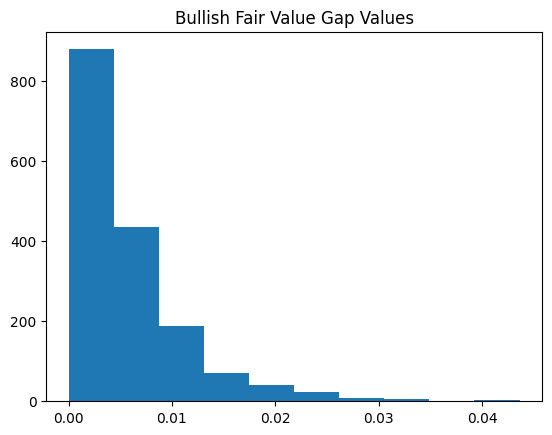

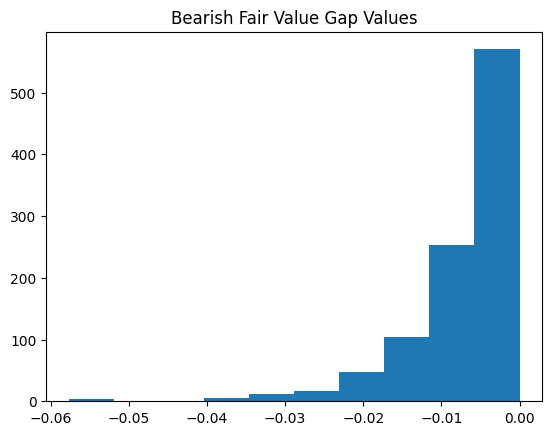

In [68]:
TICKER = 'SPY'
LOOKBACK = 10000
HOLDING_PERIOD = 5

def get_data(ticker=TICKER):
    df = yf.download(ticker)
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:, :]

def bull_fvg(df):

    df['High_2prev'] = df['High'].shift(2)
    df['Bull_FVG'] = (df['Low'] > df['High_2prev']).astype(int)
    df['Bull_FVG_Val'] = (df['Low'] - df['High_2prev']) * df['Bull_FVG'] / df['Close']

    fvg_subset = df[df['Bull_FVG_Val'] > 0]

    plt.hist(fvg_subset['Bull_FVG_Val'], bins=10)
    plt.title('Bullish Fair Value Gap Values')

    return df

def bear_fvg(df):

    df['Low_2prev'] = df['Low'].shift(2)
    df['Bear_FVG'] = (df['High'] < df['Low_2prev']).astype(int)
    df['Bear_FVG_Val'] = (df['High'] - df['Low_2prev']) * df['Bear_FVG'] / df['Close']

    fvg_subset = df[df['Bear_FVG_Val'] < 0]

    plt.figure()
    plt.hist(fvg_subset['Bear_FVG_Val'], bins=10)
    plt.title('Bearish Fair Value Gap Values')

    return df

def assess_bull_FVG(df, holding_period=HOLDING_PERIOD):

    #5 day holding period returns
    df[f'Returns_In_{holding_period}_Periods'] = df['Close'].shift(-holding_period) / df['Close']
    
    fvg_subset = df[df['Bull_FVG_Val'] > 0]
    print(f'{len(fvg_subset)} trades taken')
    print(f'Bull FVG {holding_period} Period Average returns: {round((fvg_subset[f'Returns_In_{holding_period}_Periods'].mean() - 1) * 100, 2)}%')

    return df

def assess_bear_FVG(df, holding_period=HOLDING_PERIOD):

    #5 day holding period returns
    df[f'Returns_{holding_period}P_Ago'] = df['Close'].shift(-holding_period) / df['Close']
    
    fvg_subset = df[df['Bear_FVG_Val'] < 0]
    print(f'{len(fvg_subset)} trades taken')
    print(f'Bear FVG {holding_period} Period Average returns: {round((fvg_subset[f'Returns_In_{holding_period}_Periods'].mean() - 1) * 100, 2)}%')

    return df

def main():
    df = get_data()
    df = bull_fvg(df)
    df = bear_fvg(df)
    df = assess_bull_FVG(df)
    df = assess_bear_FVG(df)

    return df

df = main()